# Audio Analysis and Anonymization Notebook

*Author: Gabriel Bibbó (University of Surrey)*

Welcome to this interactive guide designed to analyze and anonymize audio recordings. This notebook will walk you through the process of detecting speech in an audio file, visualizing the detected speech events, and anonymizing segments of the audio to protect privacy. The process is automated; you only need to provide the audio file and adjust a few settings.

## How to Use This Notebook

- **Prepare Your Audio File**: Upload your audio file to the notebook.
- **Modify the Variable Definitions**: Adjust the file paths and settings in the designated "Variable Definition and File Upload" section.
- **Run the Cells**: Execute each cell sequentially to analyze and anonymize your audio.



## Installation

The next cell downloads the GitHub repository, installs the necessary libraries and downloads the pre-trained model.

In [1]:
!git clone https://github.com/gbibbo/voice_anonymization.git
%cd /content/voice_anonymization/
!pip install -r requirements.txt --quiet
CHECKPOINT_PATH="Cnn14_DecisionLevelMax_mAP=0.385"
!wget -O "$CHECKPOINT_PATH" https://zenodo.org/record/3987831/files/Cnn14_DecisionLevelMax_mAP%3D0.385.pth?download=1
MODEL_TYPE="Cnn14_DecisionLevelMax"

Cloning into 'voice_anonymization'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 143 (delta 51), reused 12 (delta 0), pack-reused 0
Receiving objects: 100% (143/143), 698.71 KiB | 7.28 MiB/s, done.
Resolving deltas: 100% (51/51), done.
/content/voice_anonymization
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 57.3

## Variable Definition and File Upload

This section is for setting up your audio file and defining essential parameters. **You should edit this section** with your audio file path and desired settings.

### Parameters to Adjust

#### For audio analysis and label generation:
- `AUDIO_PATH`: The path to your audio file
- `SAMPLE_RATE`: The sampling rate of your audio file (default is 48000 Hz).
- `OUTPUT_PATH`: Directory where the anonymized audio and visualizations will be stored
- `JSON_PATH`: The path where the detection results will be saved

#### For removal of specific labels:
- `LABELS`: List of labels to be removed
- `THRESHOLD`: Confidence threshold of the predictions above which they will be eliminated
- `MUTE_TIME_EXTENTION`: Time in seconds of audio that will be removed before and after detecting labels that exceed the threshold
- `AUDIO_OUTPUT`: Resulting audio after removal of the corresponding sections

Upload your audio file using the Colab file upload feature and update the paths below accordingly.


In [2]:
AUDIO_PATH = "/content/voice_anonymization/resources/sync.WAV"
SAMPLE_RATE = 48000
OUTPUT_PATH = "/content/voice_anonymization/resources"
JSON_PATH = "/content/voice_anonymization/resources/Cnn14_DecisionLevelMax/sync.json"

LABELS = ["Speech", "Singing", "Male singing", "Female singing", "Child singing", "Male speech, man speaking", "Female speech, woman speaking", "Conversation", "Narration, monologue", "Music"]
THRESHOLD=0.2
MUTE_TIME_EXTENTION = 1
AUDIO_OUTPUT = "/content/voice_anonymization/resources/sync_muted.WAV"

## Sound Event Detection

In this section, we run the sound event detection model on your audio file.

**What Happens Here:**
- The model processes the audio file.
- Detected sound events are saved in JSON format at the specified `JSON_PATH`.
- You do not need to modify anything in this section to run it.

In [3]:
command = (
    "CUDA_VISIBLE_DEVICES=0 python3 pytorch/inference.py sound_event_detection "
    "--model_type={model_type} "
    "--checkpoint_path={checkpoint_path} "
    "--audio_path={audio_path} "
    "--cuda --sample_rate={sample_rate} "
    "--output_path={output_path}"
).format(
    model_type=MODEL_TYPE,
    checkpoint_path=CHECKPOINT_PATH,
    audio_path=AUDIO_PATH,
    sample_rate=SAMPLE_RATE,
    output_path=OUTPUT_PATH
)
!{command}

  GPU number: 0
  Total audio duration: 10.04 seconds
  Number of segments: 1.00
  Segment 1
    Processing from 0.00 to 10.04 seconds
    Sound event detection result (time_steps x classes_num): (1506, 527)
Saved sound event detection results to /content/voice_anonymization/resources/Cnn14_DecisionLevelMax/sync.json


## Anonymization of Audio

After creating the annotations, we search for the desired segments defined above (such as speaking and singing). Then in this section we apply the anonymization process to the identified segments.

**What Happens Here:**
- Speech segments are muted or altered based on the detection results.
- The anonymized audio is saved to `AUDIO_OUTPUT`.
- Run this section as is; modifications are not required unless you wish to change anonymization parameters.


In [4]:
labels_str = ",".join(LABELS)
command = (
    "python3 pytorch/cleaning.py {json_path} {audio_input} {audio_output} "
    "'{labels}' {mute_time_extention} {threshold}"
).format(
    json_path=JSON_PATH,
    audio_input=AUDIO_PATH,
    audio_output=AUDIO_OUTPUT,
    labels=labels_str,
    mute_time_extention=MUTE_TIME_EXTENTION,
    threshold=THRESHOLD
)
!{command}


Modified audio saved at: /content/voice_anonymization/resources/sync_muted.WAV


## Visualization of Results

Here we visualize the original and anonymized audio for comparison. This helps verify the effectiveness of the speech detection and anonymization processes.

**What Happens Here:**
- Spectrograms of both the original and anonymized audio are generated and displayed.
- This allows you to visually inspect the changes made during the anonymization process.


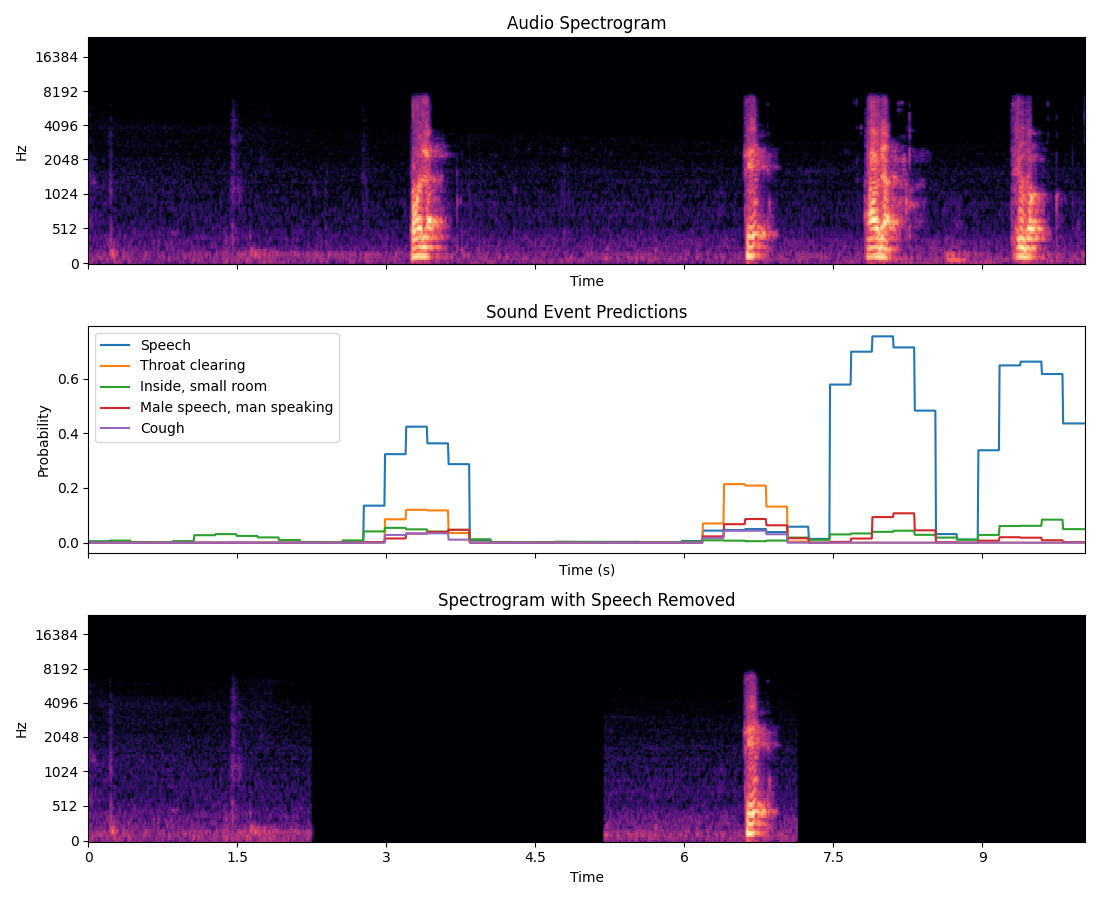

In [5]:
command = (
    "python scripts/visualization.py {audio_path} {json_path} {muted_path} "
    "--sample_rate={sample_rate} --output_dir={output_dir}"
).format(
    audio_path=AUDIO_PATH,
    json_path=JSON_PATH,
    muted_path=AUDIO_OUTPUT,
    sample_rate=SAMPLE_RATE,
    output_dir=OUTPUT_PATH
)

!{command}
from IPython.display import Image
image_path = f"{OUTPUT_PATH}/combined_plot.png"
display(Image(filename=image_path))

## Listen to audio and analyze results

You have successfully analyzed and anonymized your audio file. The output includes both the modified audio file and visualizations of the audio before and after the process. We have used the pre-trained model Cnn14_DecisionLevelMax_mAP=0.385 which has not been able to capture one of the segments containing spoken voice.

**What Happens Here:**

- Reproduce both audio files to notice the differences.

In [6]:
from IPython.display import Audio, display, HTML

display(HTML("<h2>Original Audio</h2>"))
display(Audio(AUDIO_PATH))

display(HTML("<h2>Audio with Speech Removed</h2>"))
display(Audio(AUDIO_OUTPUT))


## Analyze with another model in cascade

To reinforce the removal of the labels, we have used another cascade model. Next we will do the same analysis with Cnn14_DecisionLevelLevelAtt_mAP=0.425.pth. At the end you will be able to hear how all the voice has now been removed.

--2024-06-20 13:12:10--  https://zenodo.org/records/3987831/files/Cnn14_DecisionLevelAtt_mAP%3D0.425.pth?download=1
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 331757477 (316M) [application/octet-stream]
Saving to: ‘Cnn14_DecisionLevelAtt_mAP=0.425.pth’

Cnn14_DecisionLevel 100%[===================>] 316.39M  4.55MB/s    in 2m 13s  

2024-06-20 13:14:23 (2.38 MB/s) - ‘Cnn14_DecisionLevelAtt_mAP=0.425.pth’ saved [331757477/331757477]

  GPU number: 0
  Total audio duration: 10.04 seconds
  Number of segments: 1.00
  Segment 1
    Processing from 0.00 to 10.04 seconds
    Sound event detection result (time_steps x classes_num): (1506, 527)
Saved sound event detection results to /content/voice_anonymization/resources/Cnn14_DecisionLevelAtt/sync.json

Modified audio saved at: /content/voice_anonymization/resources/sync

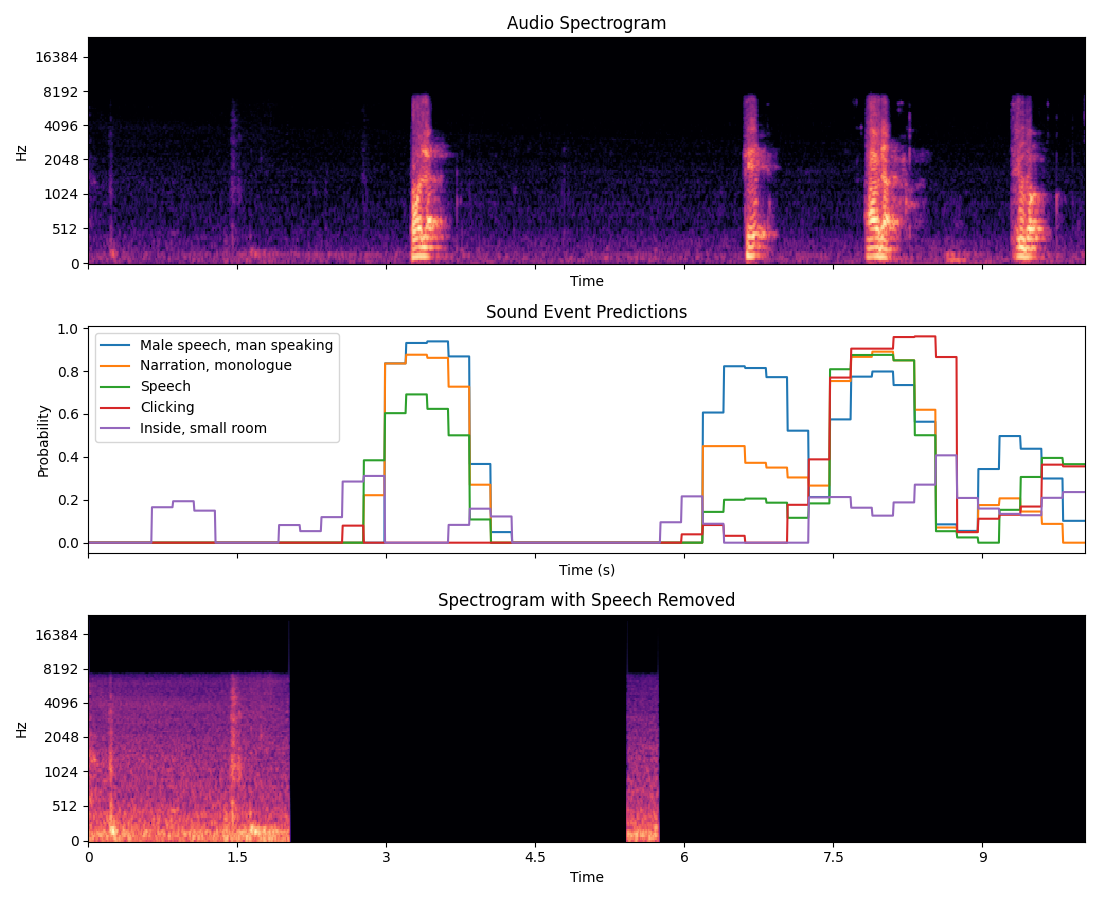

In [7]:
CHECKPOINT_PATH="Cnn14_DecisionLevelAtt_mAP=0.425.pth"
!wget -O "$CHECKPOINT_PATH" https://zenodo.org/records/3987831/files/Cnn14_DecisionLevelAtt_mAP%3D0.425.pth?download=1
MODEL_TYPE="Cnn14_DecisionLevelAtt"
AUDIO_PATH = "/content/voice_anonymization/resources/sync.WAV"
SAMPLE_RATE = 48000
OUTPUT_PATH = "/content/voice_anonymization/resources"
JSON_PATH = "/content/voice_anonymization/resources/Cnn14_DecisionLevelAtt/sync.json"
AUDIO_OUTPUT = "/content/voice_anonymization/resources/sync_muted.WAV"

command = (
    "CUDA_VISIBLE_DEVICES=0 python3 pytorch/inference.py sound_event_detection "
    "--model_type={model_type} "
    "--checkpoint_path={checkpoint_path} "
    "--audio_path={audio_path} "
    "--cuda --sample_rate={sample_rate} "
    "--output_path={output_path}"
).format(
    model_type=MODEL_TYPE,
    checkpoint_path=CHECKPOINT_PATH,
    audio_path=AUDIO_PATH,
    sample_rate=SAMPLE_RATE,
    output_path=OUTPUT_PATH
)
!{command}

labels_str = ",".join(LABELS)
command = (
    "python3 pytorch/cleaning.py {json_path} {audio_input} {audio_output} "
    "'{labels}' {mute_time_extention} {threshold}"
).format(
    json_path=JSON_PATH,
    audio_input=AUDIO_OUTPUT,
    audio_output=AUDIO_OUTPUT,
    labels=labels_str,
    mute_time_extention=MUTE_TIME_EXTENTION,
    threshold=THRESHOLD
)
!{command}
command = (
    "python scripts/visualization.py {audio_path} {json_path} {muted_path} "
    "--sample_rate={sample_rate} --output_dir={output_dir}"
).format(
    audio_path=AUDIO_PATH,
    json_path=JSON_PATH,
    muted_path=AUDIO_OUTPUT,
    sample_rate=SAMPLE_RATE,
    output_dir=OUTPUT_PATH
)

!{command}
from IPython.display import Image
image_path = f"{OUTPUT_PATH}/combined_plot.png"
display(Image(filename=image_path))


from IPython.display import Audio, display, HTML

display(HTML("<h2>Original Audio</h2>"))
display(Audio(AUDIO_PATH))

display(HTML("<h2>Audio with Speech Removed (after second model applied)</h2>"))
display(Audio(AUDIO_OUTPUT))